In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [36]:
img_height = 224
img_width = 224
input_shape = (img_width, img_height, 3)
batch_size = 8
train_dir = pathlib.Path('D:/Thesis_data/color_training_img')
test_dir  = pathlib.Path('D:/Thesis_data/color_testing_img')
checkpoint_dir = pathlib.Path('D:./TF_checkpoint/cacao_CNN/weight/')
model_dir = pathlib.Path('D:./TF_backup/cacao_CNN/model6.h5')
model_plot_dir = pathlib.Path('D:./TF_backup/cacao_CNN/model6.png')
classes = ['Brown', 'Others', 'PP', 'Purple', 'Slaty', 'White']

In [38]:
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# 
test_ds = test_ds.prefetch(1)

Found 6048 files belonging to 6 classes.


In [42]:
input_layer = layers.Input(shape=input_shape)
# contrast = tf.image.adjust_contrast(input_layer, 2)
satu = tf.image.adjust_saturation(input_layer, 1.8)
model = keras.Model(input_layer, satu)
# model.summary()

Brown
Purple
Others
Slaty
PP
Purple
Purple
PP


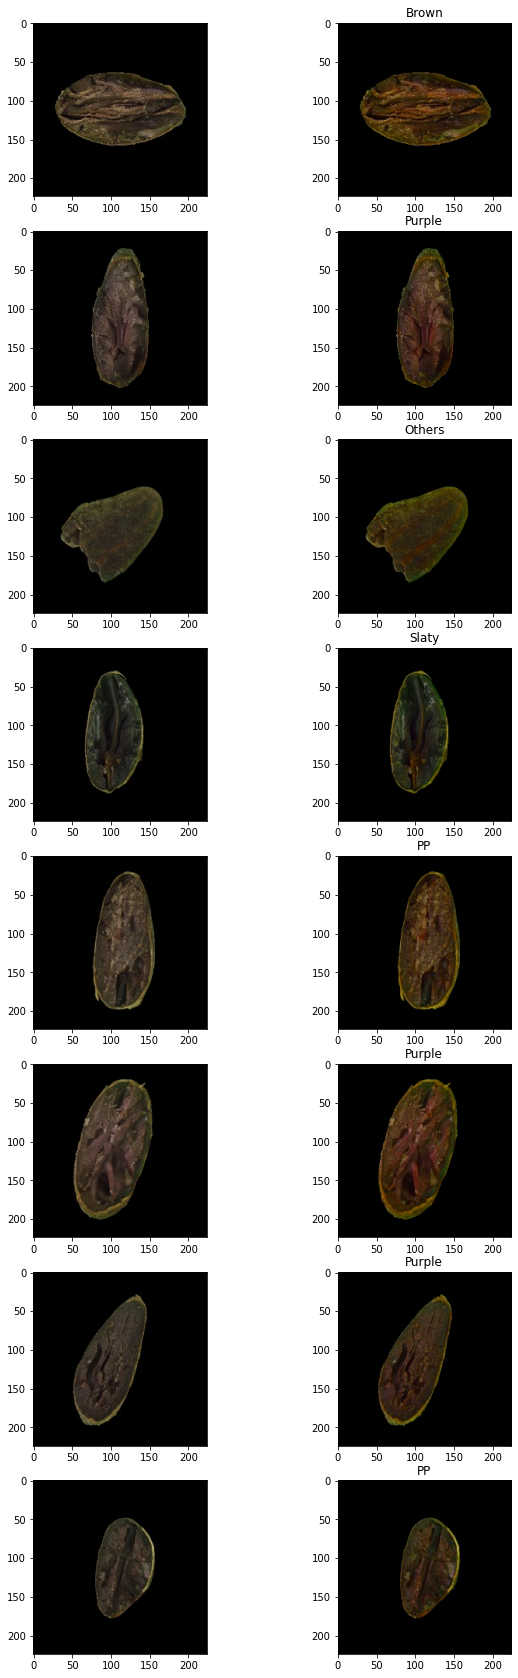

In [43]:
matplotlib.rcParams['figure.figsize'] = [10, 30]
for img_batch, lab_batch in test_ds.take(1):
    fed = model.predict(img_batch)
    for i in range(batch_size):
        tt = classes[np.argmax(lab_batch[i])]
        # print(tt)
        plt.subplot(8,2,2*i+1)
        plt.imshow(np.asarray(img_batch[i].numpy(), dtype=np.uint8))
        plt.subplot(8,2,2*i+2)
        plt.imshow(np.asarray(fed[i], dtype=np.uint8))
        plt.title(tt)